In [1]:
import os
import sys
from nrel_uitls import CLIMATEZONES, RESTYPES
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
# import h5py
# from storage import upload_to_bucket

from schema import Schema, TimeSeriesOutput, ShoeboxGeometryParameter, ShoeboxOrientationParameter, BuildingTemplateParameter, WhiteboxSimulation, WindowParameter, SchedulesParameters


In [2]:
with open("./data/city_map.json","r") as f:
	city_map = json.load(f)

In [3]:
timeseries = [
    TimeSeriesOutput(
        name="DistrictCooling",
        # var_name="Cooling:DistrictCooling",
        key_name="Cooling:DistrictCooling",
        key="OUTPUT:METER",
        freq="Monthly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="DistrictHeating",
        key_name="Heating:DistrictHeating",
        key="OUTPUT:METER",
        freq="Monthly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="Supply Air Heating",
        var_name="Zone Ideal Loads Supply Air Total Heating Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="Supply Air Cooling",
        var_name="Zone Ideal Loads Supply Air Total Cooling Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="OA Heating",
        var_name="Zone Ideal Loads Outdoor Air Total Heating Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    TimeSeriesOutput(
        name="OA Cooling",
        var_name="Zone Ideal Loads Outdoor Air Total Cooling Energy",
        key="OUTPUT:VARIABLE",
        freq="Hourly",
        store_output=True,
    ),
    #Zone Ideal Loads Supply Air Total Heating Energy 
    #Zone Ideal Loads Zone Total Heating Energy
]
schema = Schema(timeseries_outputs=timeseries)
# schema = Schema()

## Compare UMI shoebox to whitebox

Load a few random umi shoeboxes

In [4]:
from umi_surrogate import UmiSurrogate
umi_path = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings.umi"
energy_results_path = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus"
umi = UmiSurrogate.open(
    umi_path=umi_path, 
    schema=schema,
    compute_loss=True,
    energy_results_path=energy_results_path,
    checkpoint="deeper_output_net_with_leaky_relus_resumed/deeper_output_net_with_leaky_relus_resumed_202307232139_000_350000.pt")
# Load energy results
new_p = "D:/Users/zoelh/GitRepos/ml-for-building-energy-modeling/umi/Sample/SampleBuildings/eplus"
# new_p = "C:/Users/zoele/Git_Repos/ml-for-building-energy-modeling/umi/SampleBuildings/eplus"
umi.set_energy_path(new_p)
umi.fetch_raw_shoebox_results(override=False)
print(umi.shoeboxdf.shape)
umi.shoeboxdf.head()

INFO:UmiSurrogate:Umi shoebox hourly energy will be saved in d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\umi\energy
INFO:UmiSurrogate:Opening umi project. This may take a few moments...
INFO:UmiSurrogate:Project name: SampleBuildings
INFO:UmiSurrogate:Setting up umi surrogate...
INFO:UmiSurrogate:Extracting climate data from umi project.
INFO:UmiSurrogate:Successfully loaded EPW file Data for [Boston Logan IntL Arpt]
INFO:UmiSurrogate:Climate vector loaded with shape (7, 8760)
INFO:UmiSurrogate:Collecting data from building templates...
INFO:Surrogate:Using cuda for surrogate model.
INFO:Surrogate:28 building parameters per input vector
INFO:Surrogate:11 timeseries per input vector
INFO:Surrogate:4 timeseries per output vector
INFO:Surrogate:12 timesteps in output.
INFO:Surrogate:Initializing machine learning objects...
INFO:Surrogate:ML objects initialized.
INFO:UmiSurrogate:Hourly output already calculated and saved under d:\Users\zoelh\GitRepos\ml-for-building

(364, 25)


,ParentBuildingId,PerimeterAreaWeight,CoreAreaWeight,PerimeterArea,CoreArea,Orientation,ClusterId,Roof2FloorRatio,Ground2FloorRatio,Floor2Fac,...,Height,Name,Occupancy,TemplateName,UseType,WwrE,WwrN,WwrS,WwrW,geometry
0,45528662-89aa-7b48-8da3-1153c0ecbd22,258.010417,344.437341,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
1,45528662-89aa-7b48-8da3-1153c0ecbd22,23.925238,31.939584,1255.630962,1676.23538,West,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
2,45528662-89aa-7b48-8da3-1153c0ecbd22,319.021121,425.885078,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
3,45528662-89aa-7b48-8da3-1153c0ecbd22,27.396955,36.574237,1255.630962,1676.23538,North,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."
4,45528662-89aa-7b48-8da3-1153c0ecbd22,344.588024,460.016242,1255.630962,1676.23538,South,Group0,0.25,0.25,0.820404,...,13.122101,3633.0,586,PROG_00_VINTAGE_03_MASS_0,Uncategorized,0.4,0.4,0.4,0.4,"MULTIPOLYGON (((3548.30123 927.87828, 3553.338..."


In [5]:
# randomly select n samples
n = 2
indices = np.random.randint(0, high=umi.shoeboxdf.shape[0])
test_sbs = umi.shoeboxdf.iloc[indices:indices+n-1]
storage_b = schema.generate_empty_storage_batch(n)
storage_b.shape

(2, 93)

In [6]:
schema.parameters[schema.parameter_names.index('orientation')].shape_ml

(4,)

In [7]:
[p.name for p in schema.parameters 
    if p.in_ml and 
    isinstance(p, (ShoeboxGeometryParameter, ShoeboxOrientationParameter))
    ]

['width',
 'height',
 'facade_2_footprint',
 'perim_2_footprint',
 'roof_2_footprint',
 'footprint_2_ground',
 'wwr',
 'orientation']

In [8]:
from pyumi.shoeboxer import ShoeBox

(shoebox_norm_geom_params, shoebox_norm_tsol_vector) = umi.get_norm_shoebox_geom_params(start_idx=indices, count=n)
template_norm_geom_params = umi.get_building_params_from_templates()
shoebox_template_ids = umi.get_shoebox_template_ids(
            start_idx=indices, count=n
        )
shoebox_norm_template_geom_params = template_norm_geom_params[shoebox_template_ids]
# Create a whitebox from idf values
building_vectors = np.concatenate(
        (
            shoebox_norm_geom_params[:, :-3],
            shoebox_norm_template_geom_params,
            shoebox_norm_geom_params[:, -3:],
        ),
        axis=1,
    )

INFO:UmiSurrogate:Fetching shoebox IDFs.
INFO:UmiSurrogate:Completed fetching shoebox IDFs in 24 seconds.
INFO:UmiSurrogate:AREA MAX: 61.27799083525315, MIN 19.236060654977337
INFO:UmiSurrogate:PERIM AREA MAX: 9.0, MIN 9.0
INFO:UmiSurrogate:CORE AREA MAX: 52.27764571015723, MIN 52.27666363003664
INFO:UmiSurrogate:Loaded Shoebox Geometry Array. Shape=(2, 14)
INFO:UmiSurrogate:Templates's geometry parameters shape=(32, 12)


In [ ]:
# Building vector to storage vector

In [22]:
# from storage import download_epws
# download_epws()

INFO:Storage:Downloading bucket:epws/city_epws_indexed.zip to file:d:\Users\zoelh\GitRepos\ml-for-building-energy-modeling\ml-for-bem\data\epws\city_epws_indexed.zip...
INFO:Storage:Done downloading.
INFO:Storage:Unzipping EPWs...
INFO:Storage:Done unzipping EPWs.


In [15]:
# for param in schema.parameters:
#     if param.name in ShoeboxConfiguration.__slots__:
#         print(param.name)
#         schema.shoebox_config

In [35]:
from schema import ShoeboxConfiguration
storage_b = schema.generate_empty_storage_batch(n)
print(building_vectors.shape)
storage_b[:, 5:5+building_vectors.shape[1]] = building_vectors
print(storage_b.shape)
# Set climate zone - unused
schema.update_storage_batch(storage_b, parameter="climate_zone", value=2)
schema.update_storage_batch(storage_b, parameter="base_epw", value=city_map["CA, Los Angeles"]["idx"])
# Set shoebox config
# for param in schema.parameters:
#     if param.name in ShoeboxConfiguration.__slots__:
#         print(param.name)
#         # get value from batch vector
#         val = schema[param.name].extract_storage_values_batch(storage_b)
#         schema.update_storage_batch(storage_b, parameter=param.name, value=val)
#         # setattr(schema.shoebox_config, param.name, val)
schema['HeatingSetpoint'].extract_storage_values_batch(storage_b)
# orientation takes up 4 spaces in the ml but one in storage batch?

(2, 26)
(2, 93)


array([[0.],
       [1.]])

In [20]:
whitebox_sim = WhiteboxSimulation(schema, storage_b[0])

KeyError: 0.305472687413836

In [ ]:
for i, sb in test_sbs.iterrows():
    # Open the idf
    eplus_model = ShoeBox(sb["ShoeboxPath"])
    # Show the model
    eplus_model.view_model()

## Check whitebox output edits

In [4]:
storage_vector = schema.generate_empty_storage_vector()
# just using 
# TODO: orientation
# TODO: setpoint value overlaps
# TODO: Fix template Selector
# TODO: window u value coming out different
schema.update_storage_vector(storage_vector, parameter="climate_zone", value=CLIMATEZONES["2A"])
schema.update_storage_vector(storage_vector, parameter="vintage", value=1920)
schema.update_storage_vector(storage_vector, parameter="program_type", value=RESTYPES["Multi-Family with 5+ Units"])
schema.update_storage_vector(storage_vector, parameter="base_epw", value=city_map["CA, Los Angeles"]["idx"])
schema.update_storage_vector(storage_vector, "height", 3)
schema.update_storage_vector(storage_vector, "width", 3)
schema.update_storage_vector(storage_vector, "facade_2_footprint", 0.3)
schema.update_storage_vector(storage_vector, "perim_2_footprint", 0.5)
schema.update_storage_vector(storage_vector, "roof_2_footprint", 0.05)
schema.update_storage_vector(storage_vector, "footprint_2_ground", 0.5)
schema.update_storage_vector(storage_vector, "wwr", 0.3)
schema.update_storage_vector(storage_vector, "orientation", 0)
schema.update_storage_vector(storage_vector, "Infiltration", 1.0)
schema.update_storage_vector(storage_vector, "HeatingSetpoint", 18)
schema.update_storage_vector(storage_vector, "CoolingSetpoint", 24)
schema.update_storage_vector(storage_vector, "PeopleDensity", 0.05)
schema.update_storage_vector(storage_vector, "LightingPowerDensity", 3)
schema.update_storage_vector(storage_vector, "EquipmentPowerDensity", 7)
schema.update_storage_vector(storage_vector, "RoofRValue", 2)
schema.update_storage_vector(storage_vector, "SlabRValue", 2)
schema.update_storage_vector(storage_vector, "FacadeRValue", 2)
schema.update_storage_vector(storage_vector, "FacadeMass", 10000) 
schema.update_storage_vector(storage_vector, "RoofMass", 10000)
# schema.update_storage_vector(storage_vector, "WindowSettings", np.array([1.0,0.5,0.5])) 

#NEW VALUES
schema.update_storage_vector(storage_vector, "WindowSettings", 2)
schema.update_storage_vector(storage_vector, "shading_seed", 2)
schema.update_storage_vector(storage_vector, "EconomizerSettings", 1)
schema.update_storage_vector(storage_vector, "RecoverySettings", 2)

schedules = schema["schedules"].extract_storage_values(storage_vector)
sched_demo = "NONE"
if sched_demo == "BASELINE":
    # Equipment
    # pass
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["noise"]] = 0.2
    # Lights
    schedules[2, SchedulesParameters.op_indices["invert"]] = 1
elif sched_demo == "SINE":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[0, SchedulesParameters.op_indices["sin_0_amp"]] = 0.5
    schedules[0, SchedulesParameters.op_indices["sin_0_freq"]] = 365
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[1, SchedulesParameters.op_indices["sin_0_amp"]] = 0.5
    schedules[1, SchedulesParameters.op_indices["sin_0_freq"]] = 365
    schedules[1, SchedulesParameters.op_indices["sin_1_amp"]] = 0.5
    schedules[1, SchedulesParameters.op_indices["sin_1_freq"]] = 4
    # Lights
    schedules[2, SchedulesParameters.op_indices["sin_overwrite"]] = 1
    schedules[2, SchedulesParameters.op_indices["sin_0_amp"]] = 1.0
    schedules[2, SchedulesParameters.op_indices["sin_0_freq"]] = 24 # 2 per mo
elif sched_demo == "BERNOULLI":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[0, SchedulesParameters.op_indices["uniform_random_samples"]] = 10 # samples per pattern
    schedules[0, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
    # Occupancy
    schedules[1, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[1, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[1, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
    # Lights
    schedules[2, SchedulesParameters.op_indices["uniform_random_dilation"]] = 24 # hours per sample
    schedules[2, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[2, SchedulesParameters.op_indices["uniform_random_mode"]] = 1 # bernoulli
elif sched_demo == "UNI_RAND":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[0, SchedulesParameters.op_indices["uniform_random_samples"]] = 24*7 # samples per pattern
    schedules[0, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous

    # Occupancy
    schedules[1, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[1, SchedulesParameters.op_indices["uniform_random_samples"]] = 24 # samples per pattern
    schedules[1, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous

    # Lights
    schedules[2, SchedulesParameters.op_indices["uniform_random_dilation"]] = 1 # hours per sample
    schedules[2, SchedulesParameters.op_indices["uniform_random_samples"]] = 22 # samples per pattern
    schedules[2, SchedulesParameters.op_indices["uniform_random_mode"]] = 0 # continuous
elif sched_demo == "PULSE":
    # Equipment
    schedules[0, SchedulesParameters.op_indices["pulse_period"]] = 24*7 # 7 day cycle
    schedules[0, SchedulesParameters.op_indices["pulse_width"]] = 24*5 # on for 5 days

    # Occupancy
    schedules[1, SchedulesParameters.op_indices["pulse_period"]] = 24 # 1 day cycle
    schedules[1, SchedulesParameters.op_indices["pulse_width"]] = 15 # on for 5 days

    # Lights
    schedules[2, SchedulesParameters.op_indices["pulse_period"]] = 23 # 23 hr cycle
    schedules[2, SchedulesParameters.op_indices["pulse_width"]] = 18 # on for 11 hrs

# schedules[2, SchedulesParameters.op_indices["noise"]] = 0.5 # Occupancy
schedules[1, SchedulesParameters.op_indices["noise"]] = 0.3 # Lights
# schedules[0, SchedulesParameters.op_indices["noise"]] = 0.5 # equip

In [5]:
whitebox_sim = WhiteboxSimulation(schema, storage_vector)
# whitebox_sim.summarize()

[
HVACTEMPLATE:ZONE:IDEALLOADSAIRSYSTEM,
    Block Perim Storey 0,     !- Zone Name
    Zone Block Perim Storey 0 Thermostat,    !- Template Thermostat Name
    ,                         !- System Availability Schedule Name
    50,                       !- Maximum Heating Supply Air Temperature
    13,                       !- Minimum Cooling Supply Air Temperature
    0.0156,                   !- Maximum Heating Supply Air Humidity Ratio
    0.0077,                   !- Minimum Cooling Supply Air Humidity Ratio
    NoLimit,                  !- Heating Limit
    100,                      !- Maximum Heating Air Flow Rate
    100,                      !- Maximum Sensible Heating Capacity
    NoLimit,                  !- Cooling Limit
    100,                      !- Maximum Cooling Air Flow Rate
    100,                      !- Maximum Total Cooling Capacity
    ,                         !- Heating Availability Schedule Name
    ,                         !- Cooling Availability Schedule 

In [6]:
res_hourly, res_monthly = whitebox_sim.simulate()

C:\EnergyPlusV9-2-0\ExpandObjects.EXE #0-025d74be-58c6-11ee-aa19-004e01c02093.idf: 4.00it [00:00, 10.5it/s]
C:\EnergyPlusV9-2-0\energyplus.exe 025d74be-58c6-11ee-aa19-004e01c02093.idf: 55it [00:03, 17.04it/s]


In [10]:
whitebox_sim.shoebox.idfobjects['ZONEHVAC:IDEALLOADSAIRSYSTEM']

[
ZoneHVAC:IdealLoadsAirSystem,
    Block Perim Storey 0 Ideal Loads Air System,    !- Name
    ,                         !- Availability Schedule Name
    Block Perim Storey 0 Ideal Loads Supply Inlet,    !- Zone Supply Air Node Name
    ,                         !- Zone Exhaust Air Node Name
    ,                         !- System Inlet Air Node Name
    50,                       !- Maximum Heating Supply Air Temperature
    13,                       !- Minimum Cooling Supply Air Temperature
    0.0156,                   !- Maximum Heating Supply Air Humidity Ratio
    0.0077,                   !- Minimum Cooling Supply Air Humidity Ratio
    NoLimit,                  !- Heating Limit
    100,                      !- Maximum Heating Air Flow Rate
    100,                      !- Maximum Sensible Heating Capacity
    NoLimit,                  !- Cooling Limit
    100,                      !- Maximum Cooling Air Flow Rate
    100,                      !- Maximum Total Cooling Capacity


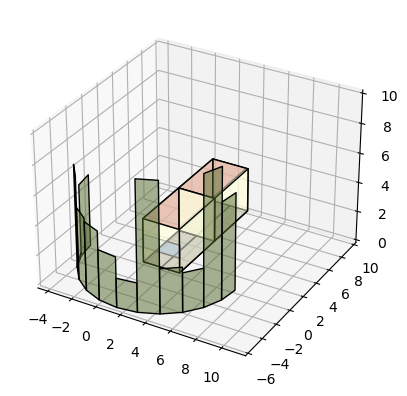

<Figure size 640x480 with 0 Axes>

(<Figure size 640x480 with 0 Axes>, [])

In [16]:
# simulate first to see shading!
whitebox_sim.shoebox.view_model()

In [8]:
for out in whitebox_sim.schema.timeseries_outputs:
    print(out.var_name if out.key_name is None else out.key_name)

Zone Ideal Loads Zone Total Heating Energy
Zone Ideal Loads Zone Total Cooling Energy
Lights Total Heating Energy
Zone Windows Total Transmitted Solar Radiation Energy
Cooling:DistrictCooling
Heating:DistrictHeating
Zone Ideal Loads Supply Air Total Heating Energy
Zone Ideal Loads Supply Air Total Cooling Energy
Zone Ideal Loads Outdoor Air Total Heating Energy
Zone Ideal Loads Outdoor Air Total Cooling Energy


In [9]:
res_monthly


IndexGroup,Facility:DistrictHeating:Heating,Facility:DistrictCooling:Cooling
KeyValue,,
Name,Heating:DistrictHeating,Cooling:DistrictCooling
2018-01-01,6.542484e+08,1.451549e+08
2018-02-01,4.330184e+08,2.206827e+08
2018-03-01,3.687470e+08,1.884335e+08
2018-04-01,2.108675e+08,2.689301e+08
2018-05-01,6.791479e+07,3.075255e+08
2018-06-01,1.203078e+07,5.591559e+08
2018-07-01,3.150412e+04,9.877798e+08
2018-08-01,0.000000e+00,9.795303e+08


In [18]:
res_hourly.head()

IndexGroup                                                    System  \
KeyValue                 BLOCK PERIM STOREY 0 IDEAL LOADS AIR SYSTEM   
Name                Zone Ideal Loads Supply Air Total Heating Energy   
2018-01-01 00:00:00                                         0.000000   
2018-01-01 01:00:00                                    129595.998602   
2018-01-01 02:00:00                                    378041.246208   
2018-01-01 03:00:00                                    619311.680120   
2018-01-01 04:00:00                                    744061.943396   

IndexGroup                                                            \
KeyValue                                                               
Name                Zone Ideal Loads Supply Air Total Cooling Energy   
2018-01-01 00:00:00                                              0.0   
2018-01-01 01:00:00                                              0.0   
2018-01-01 02:00:00                                              0.0   
2018-01-01 03:00:00                                              0.0   
2018-01-01 04:00:00                                              0.0   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Heating Energy   
2018-01-01 00:00:00                                   0.000000   
2018-01-01 01:00:00                              129595.998602   
2018-01-01 02:00:00                              378041.246208   
2018-01-01 03:00:00                              619311.680120   
2018-01-01 04:00:00                              744061.943396   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Cooling Energy   
2018-01-01 00:00:00                               0.000000e+00   
2018-01-01 01:00:00                               1.940847e-09   
2018-01-01 02:00:00                               6.266987e-09   
2018-01-01 03:00:00                               1.880096e-08   
2018-01-01 04:00:00                               2.207514e-08   

IndexGroup                                                            \
KeyValue                  BLOCK CORE STOREY 0 IDEAL LOADS AIR SYSTEM   
Name                Zone Ideal Loads Supply Air Total Heating Energy   
2018-01-01 00:00:00                                     5.743836e+05   
2018-01-01 01:00:00                                     7.379556e+05   
2018-01-01 02:00:00                                     8.710539e+05   
2018-01-01 03:00:00                                     1.028869e+06   
2018-01-01 04:00:00                                     1.076233e+06   

IndexGroup                                                            \
KeyValue                                                               
Name                Zone Ideal Loads Supply Air Total Cooling Energy   
2018-01-01 00:00:00                                              0.0   
2018-01-01 01:00:00                                              0.0   
2018-01-01 02:00:00                                              0.0   
2018-01-01 03:00:00                                              0.0   
2018-01-01 04:00:00                                              0.0   

IndexGroup                                                      \
KeyValue                                                         
Name                Zone Ideal Loads Zone Total Heating Energy   
2018-01-01 00:00:00                               5.743836e+05   
2018-01-01 01:00:00                               7.379556e+05   
2018-01-01 02:00:00                               8.710539e+05   
2018-01-01 03:00:00                               1.028869e+06   
2018-01-01 04:00:00                               1.076233e+06   

IndexGroup                                                      
KeyValue                                

In [20]:
res_monthly.sum()


IndexGroup                        KeyValue  Name                   
Facility:DistrictHeating:Heating            Heating:DistrictHeating    2.366676e+09
Facility:DistrictCooling:Cooling            Cooling:DistrictCooling    6.560333e+09
dtype: float64

In [29]:
res_hourly.sum()

IndexGroup  KeyValue                                     Name                                            
System      BLOCK PERIM STOREY 0 IDEAL LOADS AIR SYSTEM  Zone Ideal Loads Supply Air Total Heating Energy    8.779674e+08
                                                         Zone Ideal Loads Supply Air Total Cooling Energy    5.268667e+09
                                                         Zone Ideal Loads Zone Total Heating Energy          8.779720e+08
                                                         Zone Ideal Loads Zone Total Cooling Energy          5.268671e+09
            BLOCK CORE STOREY 0 IDEAL LOADS AIR SYSTEM   Zone Ideal Loads Supply Air Total Heating Energy    1.488709e+09
                                                         Zone Ideal Loads Supply Air Total Cooling Energy    1.291667e+09
                                                         Zone Ideal Loads Zone Total Heating Energy          1.488710e+09
                                        